In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install fast_ml
!pip install catboost

     |████████████████████████████████| 42 kB 416 kB/s 
     |████████████████████████████████| 76.3 MB 31 kB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fast_ml.model_development import train_valid_test_split

import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

In [ ]:
credit_data = pd.read_csv('/content/drive/MyDrive/AI_ML_Projects/Credit_Card_Default_Prediction_Practice_Project/Credit_Card.csv')
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


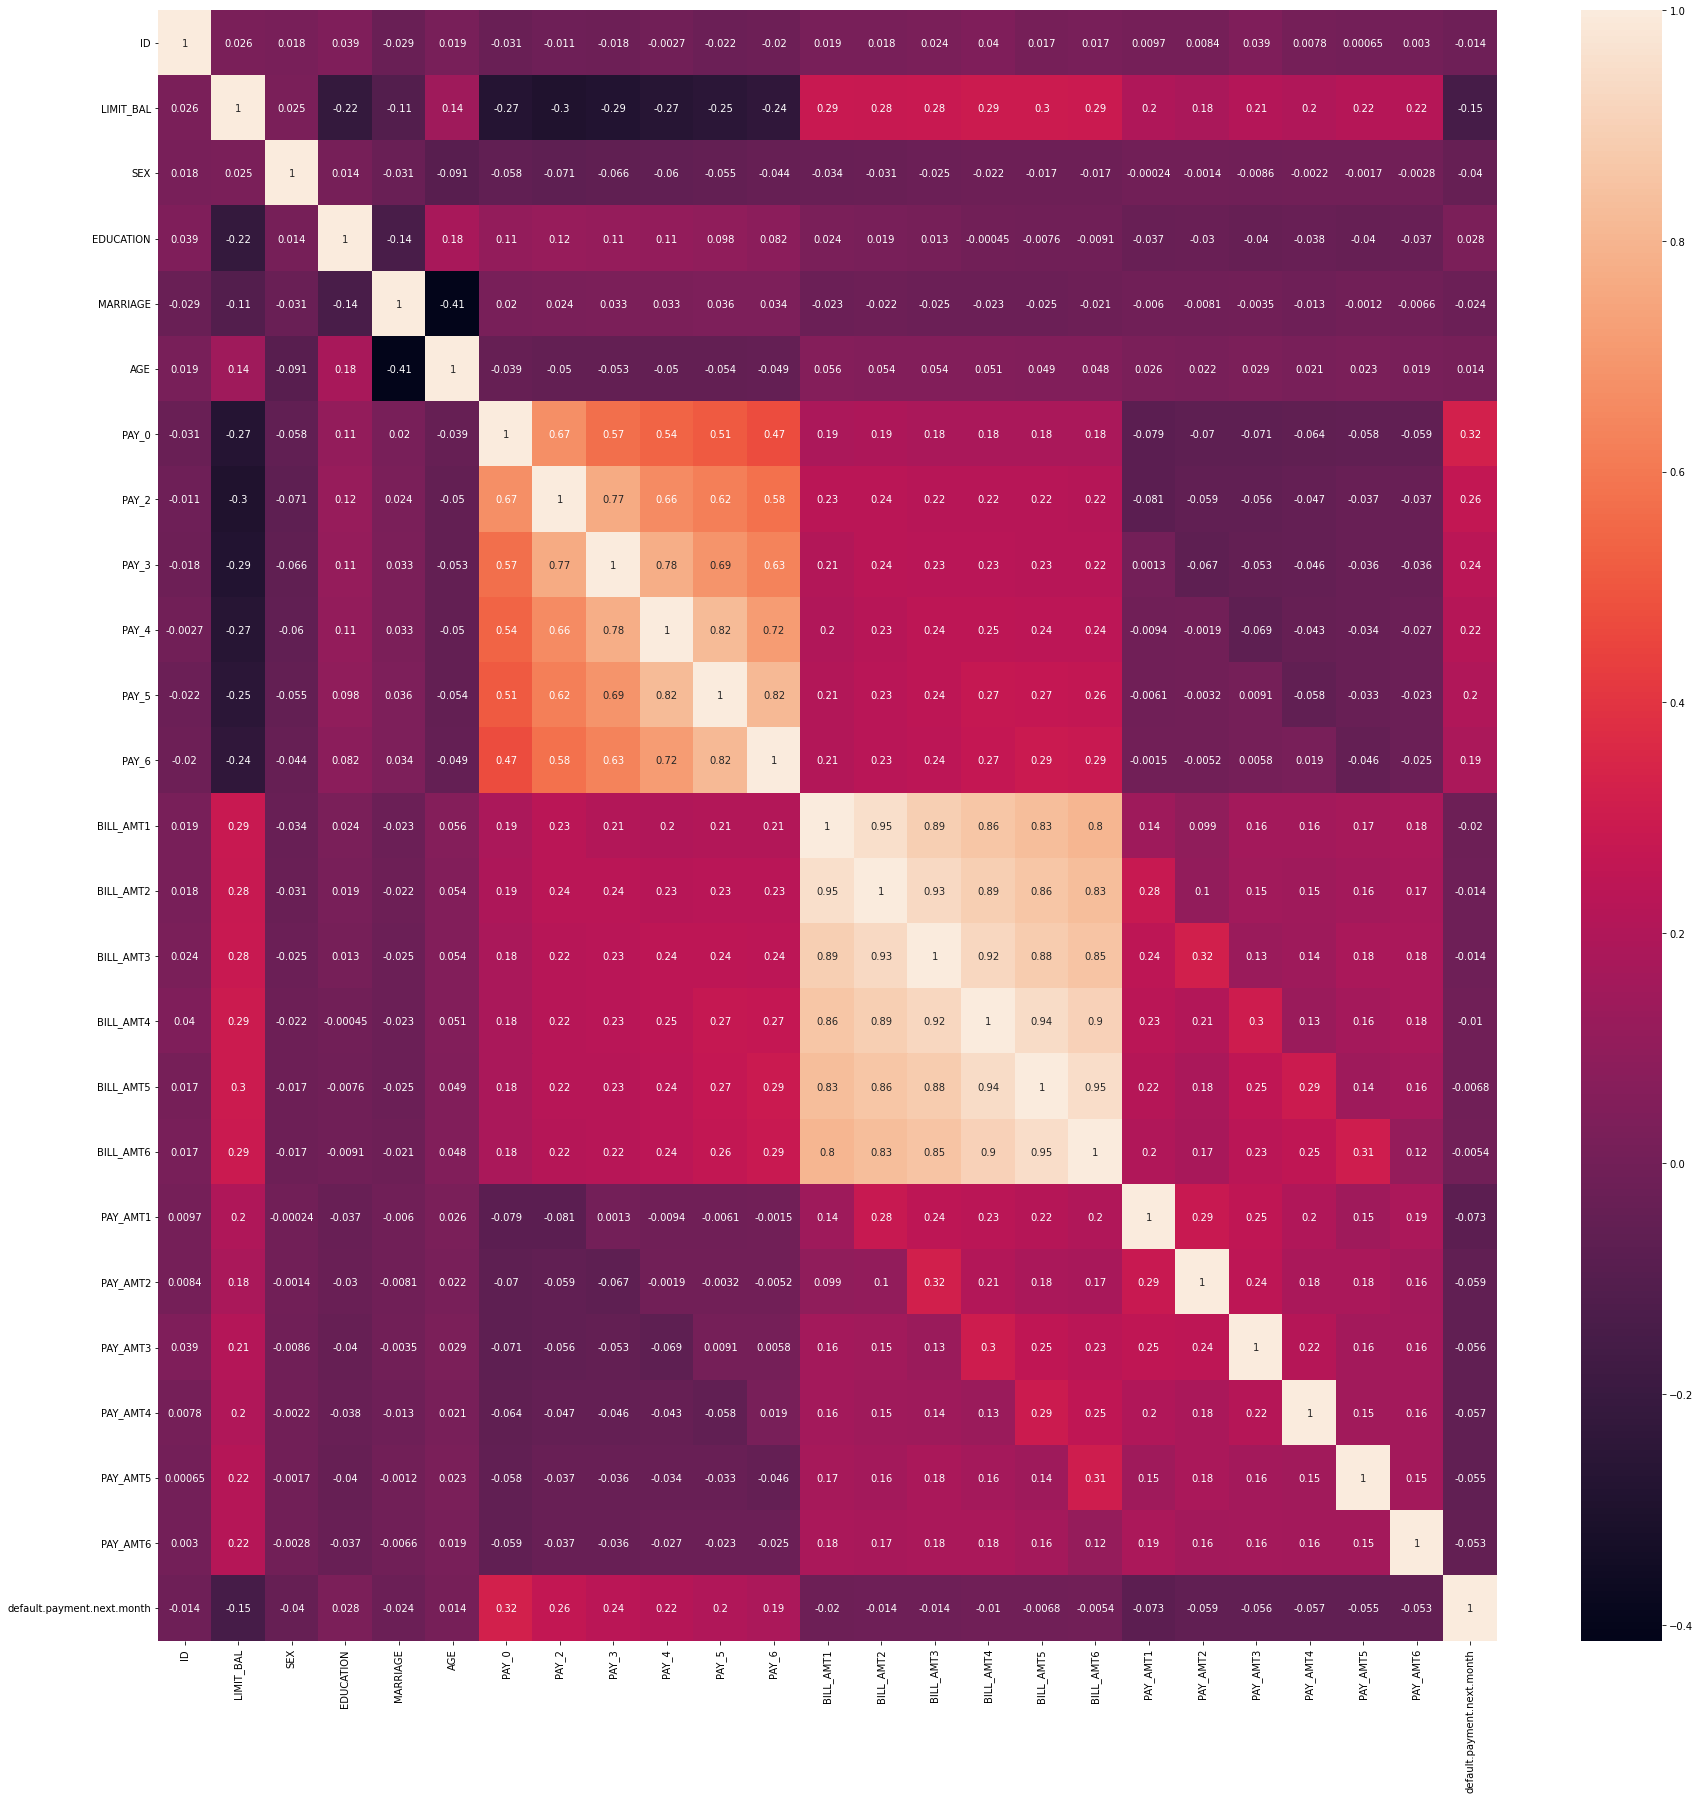

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(credit_data.corr(), annot = True)

In [ ]:
credit_data['Cred_Util_1'] = ((credit_data['BILL_AMT2']-credit_data['PAY_AMT1'])/credit_data['LIMIT_BAL'])*100
credit_data['Cred_Util_2'] = ((credit_data['BILL_AMT3']-credit_data['PAY_AMT2'])/credit_data['LIMIT_BAL'])*100
credit_data['Cred_Util_3'] = ((credit_data['BILL_AMT4']-credit_data['PAY_AMT3'])/credit_data['LIMIT_BAL'])*100
credit_data['Cred_Util_4'] = ((credit_data['BILL_AMT5']-credit_data['PAY_AMT4'])/credit_data['LIMIT_BAL'])*100
credit_data['Cred_Util_5'] = ((credit_data['BILL_AMT6']-credit_data['PAY_AMT5'])/credit_data['LIMIT_BAL'])*100

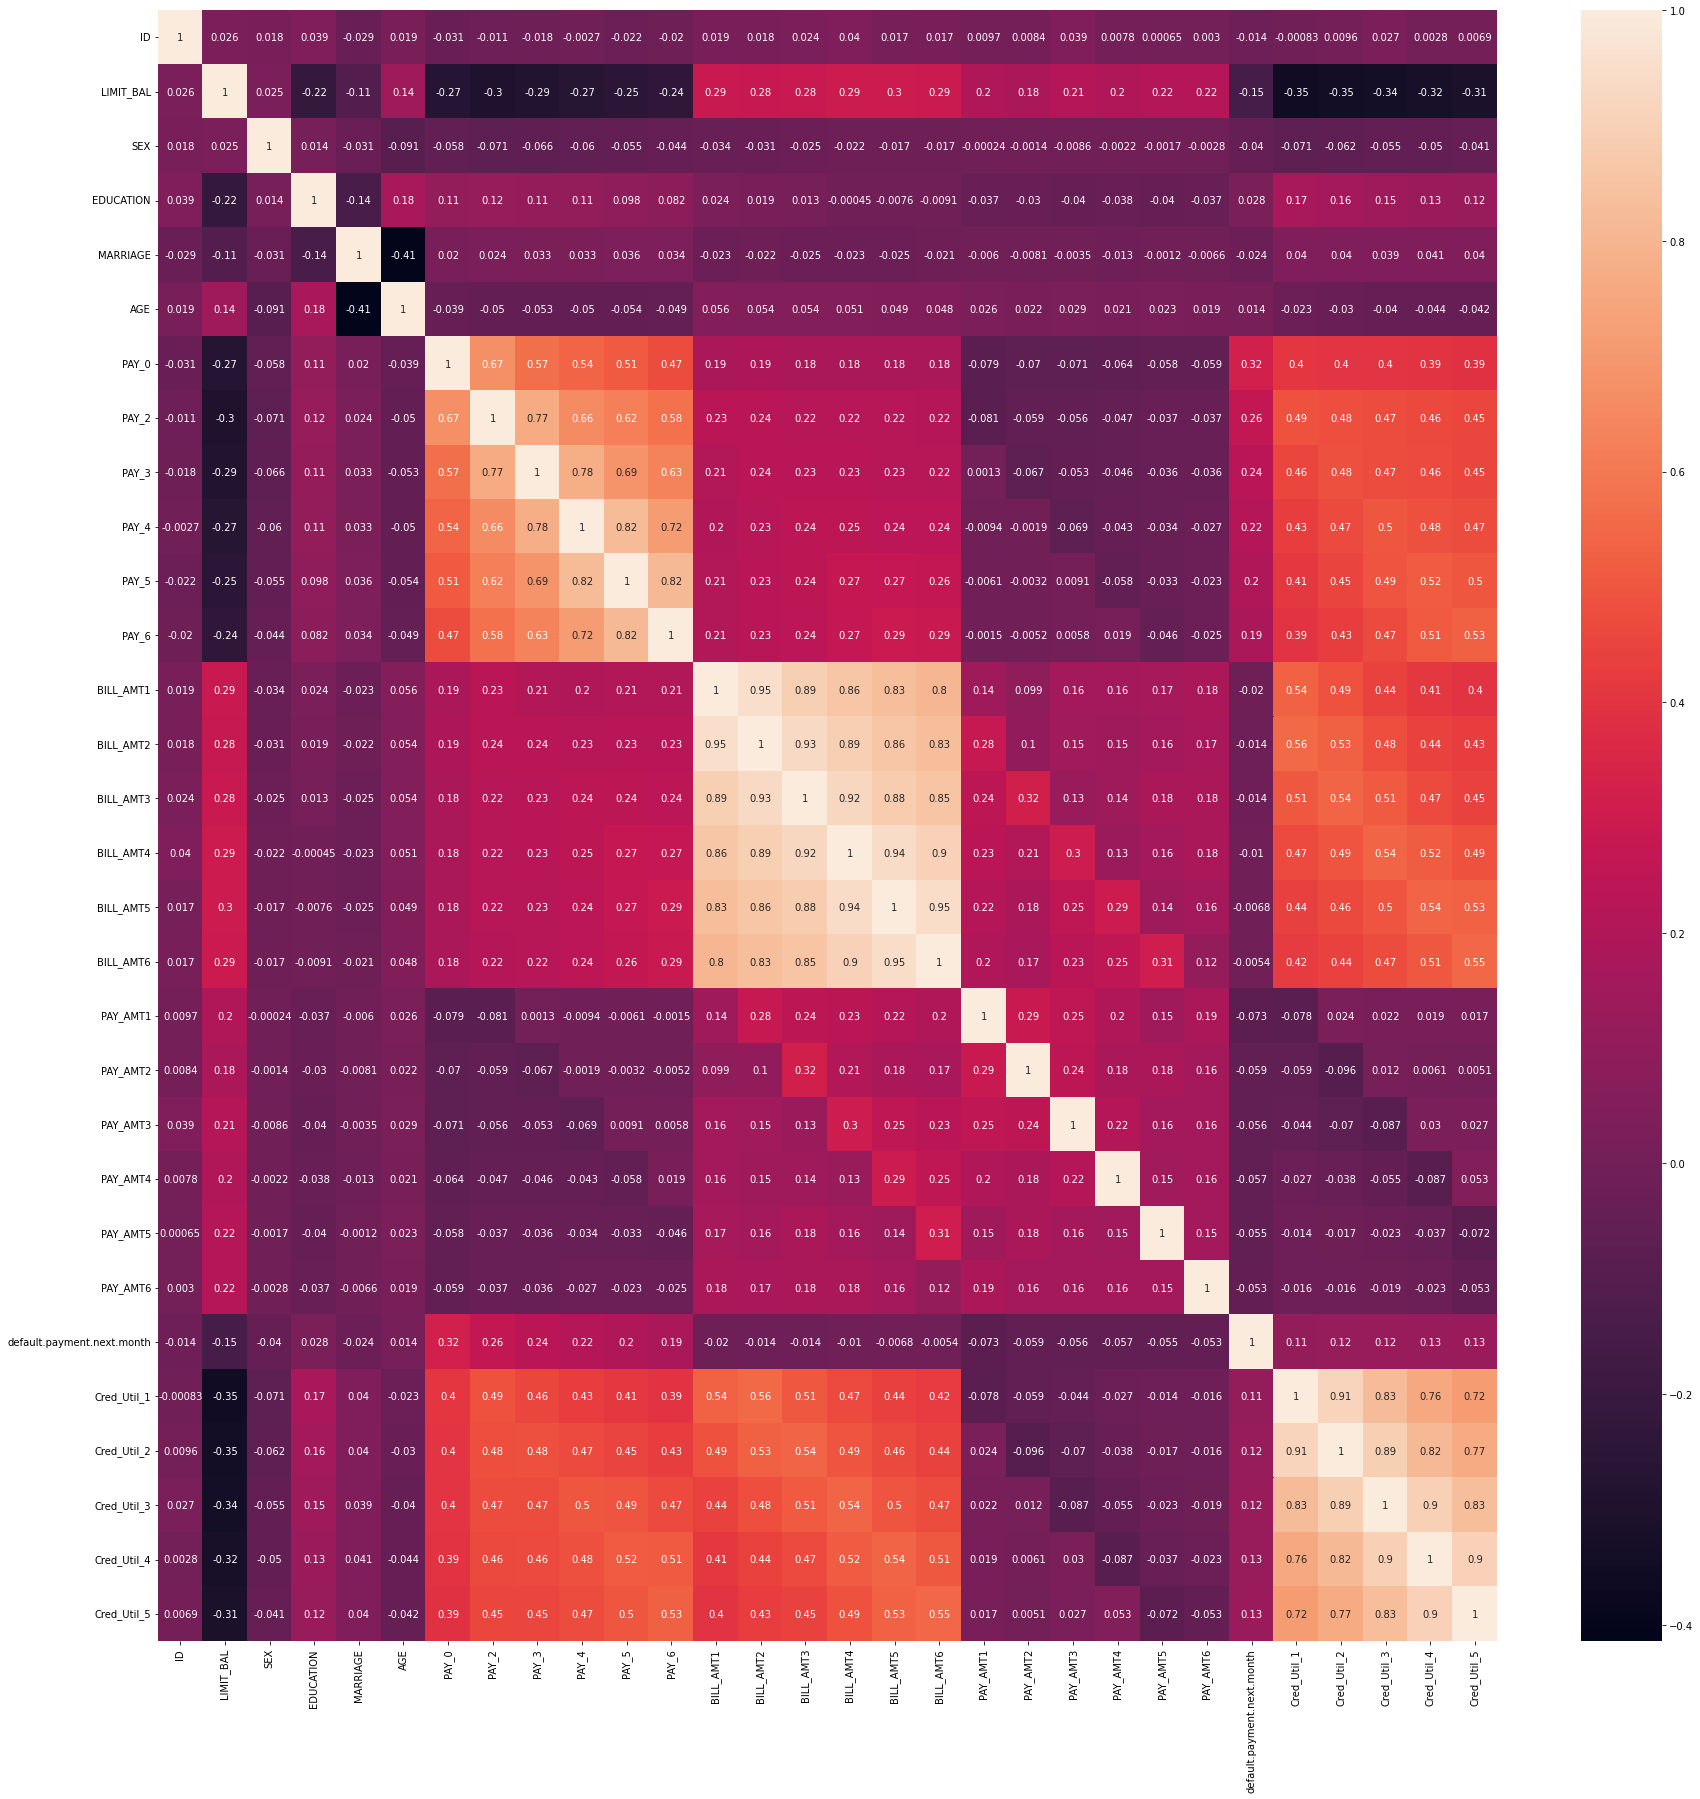

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(credit_data.corr(), annot = True)

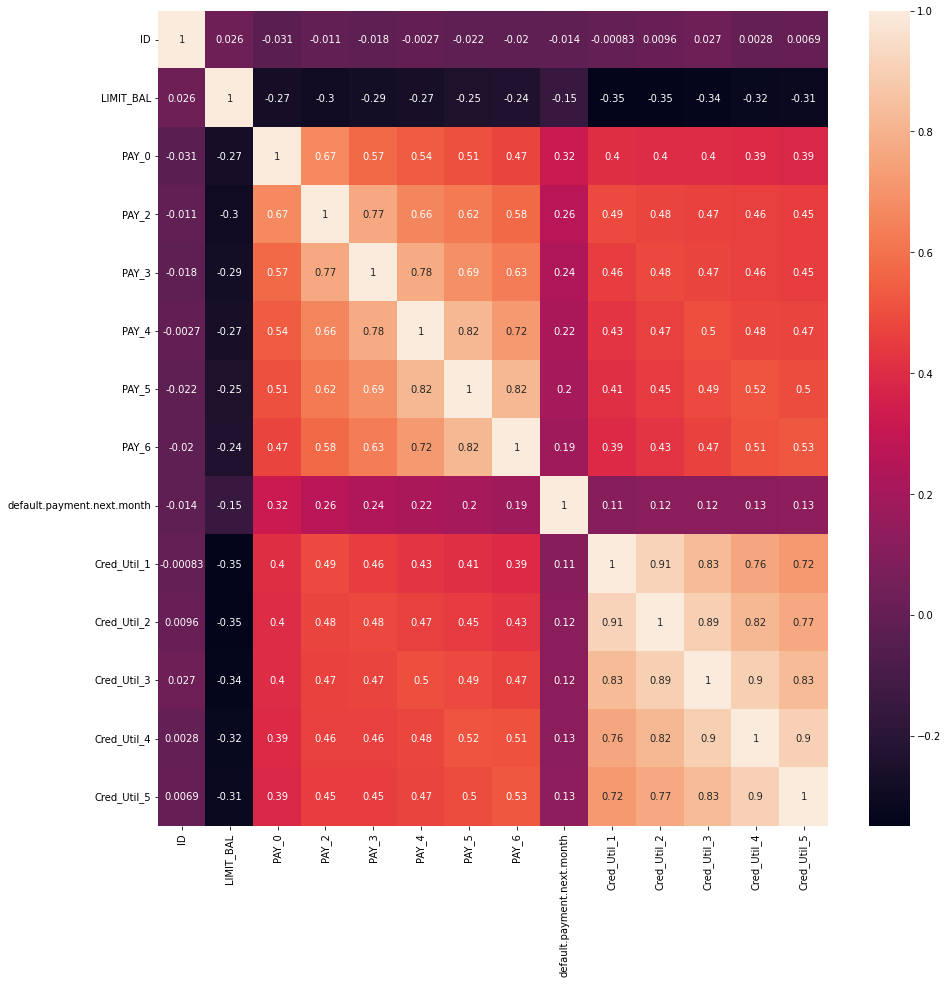

In [ ]:
credit_data_lean = credit_data.drop(columns =['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], inplace=False).copy()
plt.figure(figsize=(15,15))
sns.heatmap(credit_data_lean.corr(), annot = True)

In [ ]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = train_valid_test_split(credit_data_lean, target = 'default.payment.next.month', train_size=0.7, valid_size=0.2, test_size=0.1, random_state=3)

print(X_train.shape), print(Y_train.shape)
print(X_valid.shape), print(Y_valid.shape)
print(X_test.shape), print(Y_test.shape)

(21000, 13)
(21000,)
(6000, 13)
(6000,)
(3000, 13)
(3000,)


(None, None)

In [ ]:
accuracy_list = [0]*9
val_accuracy_list = [0]*9
model_list = ['Logistic Regression', 'SVC','KNearestNeighbours', 'DecisionTree', 'RandomForest',
              'GradientBooster', 'XGBRF','LGBM', 'CatBoostClassifier']

In [ ]:
# logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(Y_test, log_reg_pred)
accuracy_list[0] = 100*log_reg_acc

log_reg_pred_val = log_reg.predict(X_val)
log_reg_acc_val = accuracy_score(Y_val, log_reg_pred_val)
val_accuracy_list[0] = 100*log_reg_acc_val

print("Training Accuracy is:", log_reg_acc)
print("Validation Accuracy is:", log_reg_acc_val)

Training Accuracy is: 0.7846666666666666
Validation Accuracy is: 0.7888333333333334


In [ ]:
# support vector classification - SVC
sv_clf = SVC()
sv_clf.fit(X_train, Y_train)
sv_clf_pred = sv_clf.predict(X_test)
sv_clf_acc = accuracy_score(Y_test, sv_clf_pred)
accuracy_list[1] = 100 * sv_clf_acc

sv_clf_pred_val = log_reg.predict(X_val)
sv_clf_acc_val = accuracy_score(Y_val, sv_clf_pred_val)
val_accuracy_list[1] = 100 * sv_clf_acc_val

print("Training Accuracy is:", sv_clf_acc)
print("Validation Accuracy is:", sv_clf_acc_val)

Training Accuracy is: 0.7846666666666666
Validation Accuracy is: 0.7888333333333334


In [ ]:
# KNeighborsClassifier
kn_clf = KNeighborsClassifier(n_neighbors=40)
kn_clf.fit(X_train, Y_train)
kn_pred = kn_clf.predict(X_test)
kn_acc = accuracy_score(Y_test, kn_pred)
accuracy_list[2] = 100*kn_acc

kn_pred_val = log_reg.predict(X_val)
kn_acc_val = accuracy_score(Y_val, kn_pred_val)
val_accuracy_list[2] = 100*kn_acc_val

print("Training Accuracy is:", kn_acc)
print("Validation Accuracy is:", kn_acc_val)

Training Accuracy is: 0.7863333333333333
Validation Accuracy is: 0.7888333333333334


In [ ]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(max_leaf_nodes=2, random_state=3, criterion='entropy')
dt_clf.fit(X_train, Y_train)
dt_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(Y_test, dt_pred)
accuracy_list[3] = 100*dt_acc

dt_pred_val = log_reg.predict(X_val)
dt_acc_val = accuracy_score(Y_val, dt_pred_val)
val_accuracy_list[3] = 100*dt_acc_val

print("Training Accuracy is:", dt_acc)
print("Validation Accuracy is:", dt_acc_val)

Training Accuracy is: 0.8226666666666667
Validation Accuracy is: 0.7888333333333334


In [ ]:
# RandomForestClassifier
r_clf = RandomForestClassifier(max_features=0.5, max_depth=2, random_state=3)
r_clf.fit(X_train, Y_train)
r_pred = r_clf.predict(X_test)
r_acc = accuracy_score(Y_test, r_pred)
accuracy_list[4] = 100*r_acc

r_pred_val = log_reg.predict(X_val)
r_acc_val = accuracy_score(Y_val, r_pred_val)
val_accuracy_list[4] = 100*r_acc_val

print("Training Accuracy is:", r_acc)
print("Validation Accuracy is:", r_acc_val)

Training Accuracy is: 0.8223333333333334
Validation Accuracy is: 0.7888333333333334


In [ ]:
# GradientBoostingClassifier
gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=3)
gradientboost_clf.fit(X_train,Y_train)
gradientboost_pred = gradientboost_clf.predict(X_test)
gradientboost_acc = accuracy_score(Y_test, gradientboost_pred)
accuracy_list[5] = 100*gradientboost_acc

gradientboost_pred_val = log_reg.predict(X_val)
gradientboost_acc_val = accuracy_score(Y_val, gradientboost_pred_val)
val_accuracy_list[5] = 100*gradientboost_acc_val

print("Training Accuracy is:", gradientboost_acc)
print("Validation Accuracy is:", gradientboost_acc_val)

Training Accuracy is: 0.8256666666666667
Validation Accuracy is: 0.7888333333333334


In [ ]:
# xgbrf classifier
xgb_clf = xgboost.XGBRFClassifier(max_depth=2, random_state=3)
xgb_clf.fit(X_train,Y_train)
xgb_pred = xgb_clf.predict(X_test)
xgb_acc = accuracy_score(Y_test, xgb_pred)
accuracy_list[6] = 100*xgb_acc

xgb_pred_val = log_reg.predict(X_val)
xgb_acc_val = accuracy_score(Y_val, xgb_pred_val)
val_accuracy_list[6] = 100*xgb_acc_val

print("Training Accuracy is:", xgb_acc)
print("Validation Accuracy is:", xgb_acc_val)

Training Accuracy is: 0.8226666666666667
Validation Accuracy is: 0.7888333333333334


In [ ]:
# lightgbm
lgb_clf = lightgbm.LGBMClassifier(max_depth=2, random_state=3)
lgb_clf.fit(X_train,Y_train)
lgb_pred = lgb_clf.predict(X_test)
lgb_acc = accuracy_score(Y_test, lgb_pred)
accuracy_list[7] = 100*lgb_acc

lgb_pred_val = log_reg.predict(X_val)
lgb_acc_val = accuracy_score(Y_val, lgb_pred_val)
val_accuracy_list[7] = 100*lgb_acc_val

print("Training Accuracy is:", lgb_acc)
print("Validation Accuracy is:", lgb_acc_val)

Training Accuracy is: 0.8253333333333334
Validation Accuracy is: 0.7888333333333334


In [ ]:
# CatBoostClassifier
cat_clf = CatBoostClassifier()
cat_clf.fit(X_train,Y_train, silent=True)
cat_pred = cat_clf.predict(X_test)
cat_acc = accuracy_score(Y_test, cat_pred)
accuracy_list[8] = 100*cat_acc

cat_pred_val = log_reg.predict(X_val)
cat_acc_val = accuracy_score(Y_val, cat_pred_val)
val_accuracy_list[8] = 100*cat_acc_val

print("Training Accuracy is:", cat_acc)
print("Validation Accuracy is:", cat_acc_val)

Training Accuracy is: 0.821
Validation Accuracy is: 0.7888333333333334


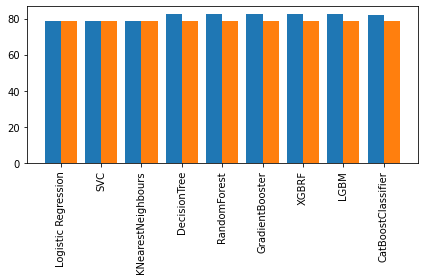

In [ ]:
x = np.arange(len(accuracy_list))
y1 = accuracy_list
y2 = val_accuracy_list
width = 0.4
fig = plt.bar(x-0.2, y1, width)
fig = plt.bar(x+0.2, y2, width)
plt.xticks(x, model_list,rotation = 90)
plt.tight_layout()